# GDP/ RQ1 Analysis

# Purpose 
The purpose of this notebook is to analyise GDPs effect on Rating Share. The Graphs created will be seen in both the presentation and the final report. Not everything in this notebook will be used in the final report and presentation. 

# Datasets
Uses: <br>
** gdp.csv ** from 300_GDP_Prep <br>
Creates: <br>
An analysis of GDP including Markdown breakdowns of results as well as graphs showcasing results. 

In [8]:
import os.path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline
import matplotlib.patches as patches
import string
import sys, os
import seaborn as sns
import operator
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
import warnings
from pandas.tools.plotting import table

# Setting out standard formatts for the Graphs below 

In [9]:
plt.rc('font', size=12)          # controls default text sizes
plt.rc('axes', titlesize=15)     # fontsize of the axes title
plt.rc('axes', labelsize=15)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=15)    # fontsize of the tick labels
plt.rc('ytick', labelsize=15)    # fontsize of the tick labels
plt.rc('legend', fontsize=15)    # legend fontsize
plt.rc('figure', titlesize=20, figsize=(15, 7.5))

In [10]:
# Ensure the file exists
if not os.path.exists(  r"..\..\data\final\gdp.csv" ):
    print("Missing dataset file")

In [11]:
# read the medal csv into a dataframe
df = pd.read_csv(  r"..\..\data\final\gdp.csv", encoding = "ISO-8859-1")

# GDP Anaylsis 
For our RQ3 we are examining the effect that GDP might have on a countries Rating share in  the Olympics. We will do this analysis in this order. 
* GDP Range
* GDP Distribution 
* Ratings on average per billion GDP
* Outliers
* Effect 
 - GDP
 - GDP wihtout Outliers
 - GDP per Capita 
 - GDP per capita without Outliers 


# GDP Range 
First we'll get values for our range which will be the max GDP, the min GDP and the mean GDP then we can plot them on a bar chart. 

In [12]:
df1 = df

In [13]:
# Getting Range values 
rangeArr = df1.sort_values('GDP').reset_index().iloc[[0,-1]].set_index('Country').GDP
rangeArr['Mean'] = df1.GDP.mean()
rangeArr

Country
Tonga            2.916737e+08
United States    1.692033e+13
Mean             7.825510e+11
Name: GDP, dtype: float64

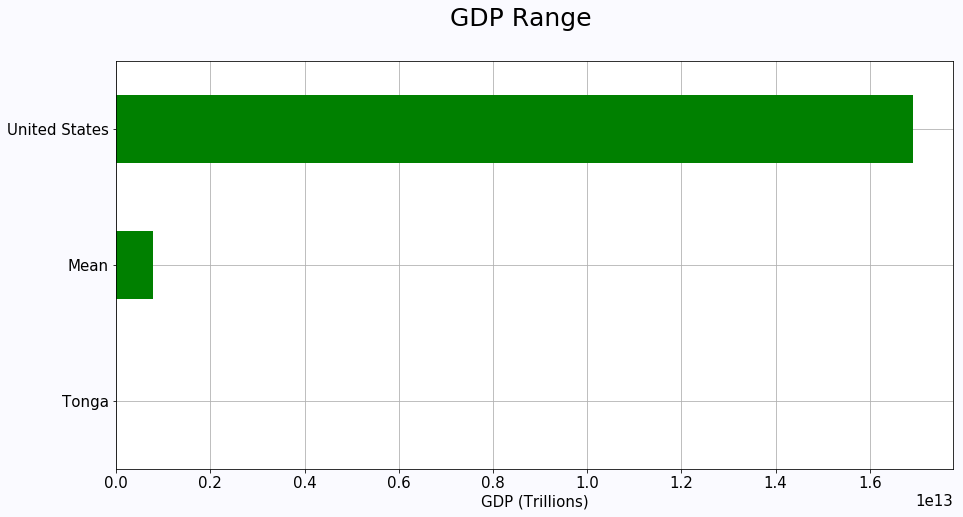

In [14]:
# Plotting the range 
fig, ax = plt.subplots(facecolor='#fafaff')

rangeArr.sort_values().plot(kind='barh',color='Green')

plt.grid()
plt.xlabel('GDP (Trillions)')
plt.ylabel('')
fig.suptitle('GDP Range', fontsize=25)
ax.set_axisbelow(True)


plt.show()
fig.savefig('../../data/final/Graphs/GDPRange.png')

# GDP Distribution 
In order to showcase the GDP distribution we will plot the GDP column on a histogram and show the mean GDP with a line in the graph. 

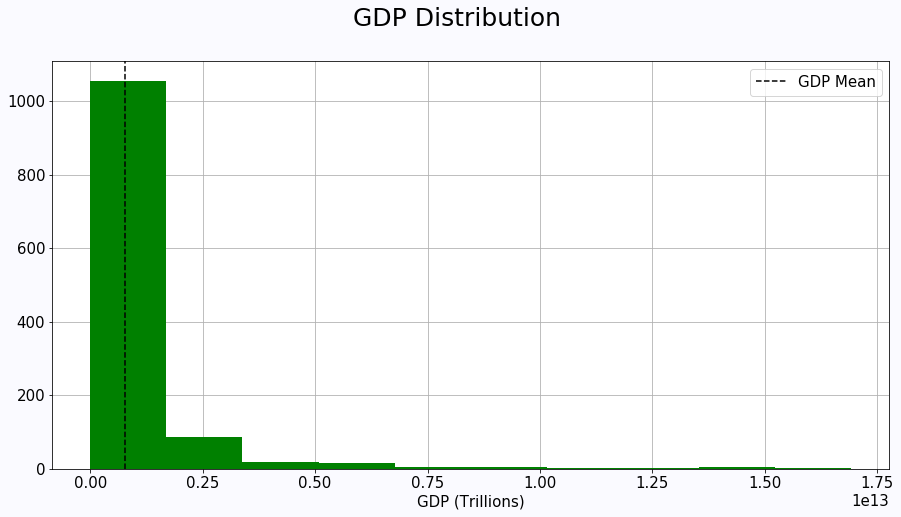

In [15]:
fig, ax = plt.subplots(facecolor='#fafaff')
df1.GDP.hist(color='Green')


plt.axvline(x=df1.GDP.mean(),color='black',label='GDP Mean',linestyle='--')

plt.legend()
plt.xlabel('GDP (Trillions)')
fig.suptitle('GDP Distribution', fontsize=25)
ax.set_axisbelow(True)

plt.show()
fig.savefig('../../data/final/Graphs/GDPDist.png')

# Ratings over GDP Per Capita

In [16]:
avgGDP =  df1.groupby(['Country'])[["GDP", 'GDP_PerCapita', 'Rating_Share']].mean()

In [17]:
avgGDP['Ratings_Relative'] = avgGDP['Rating_Share'] / (avgGDP['GDP_PerCapita'])

In [18]:
temp = avgGDP['Ratings_Relative'].sort_values().tail(10)
temp['United States'] = avgGDP['Ratings_Relative']['United States']
temp['Soviet Union'] = avgGDP['Ratings_Relative']['Soviet Union']

In [19]:
temp = temp.sort_values()

In [20]:
temp

Country
United States             0.000003
United Team of Germany    0.000006
Burundi                   0.000006
Tanzania                  0.000006
Germany (Split)           0.000007
Russian Federation        0.000010
Kenya                     0.000011
Ethiopia                  0.000017
China                     0.000019
Unified Team              0.000023
Soviet Union              0.000119
Name: Ratings_Relative, dtype: float64

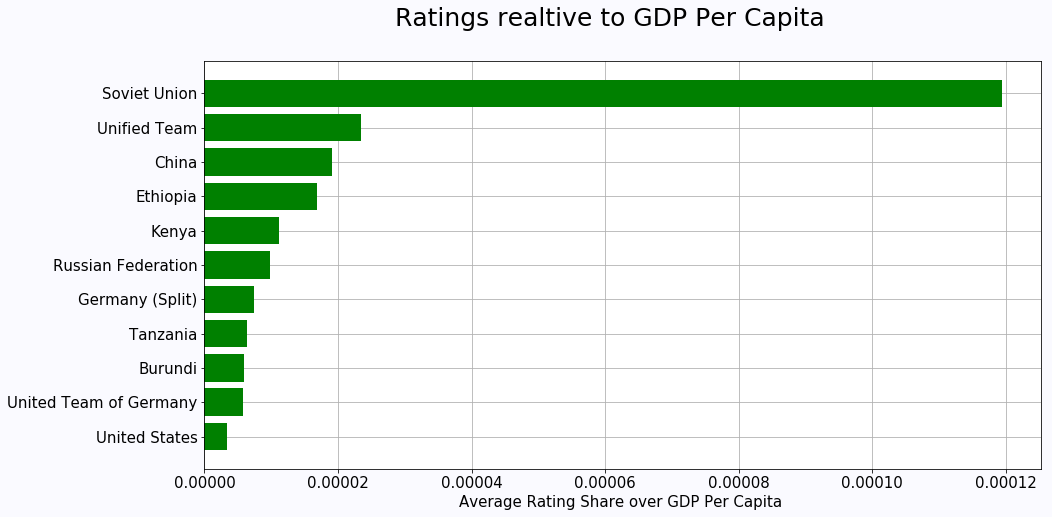

In [21]:
fig, ax = plt.subplots(facecolor='#fafaff')
ind = np.arange(11)

plt.legend()
plt.grid()
plt.xlabel('Average Rating Share over GDP Per Capita ')
plt.ylabel('')
fig.suptitle('Ratings realtive to GDP Per Capita', fontsize=25)
ax.set_axisbelow(True)

ax.barh(ind, temp.values.tolist() , color='Green')
ax.set_yticks(ind)
ax.set_yticklabels(temp.index.tolist())

plt.show()
fig.savefig('../../data/final/Graphs/GDPPCRelative.png')

In [22]:
# Ratings average over GDP per billion

In [23]:
avgGDP['Ratings_Relative'] = avgGDP['Rating_Share'] / (avgGDP['GDP'] / 1000000000)

In [24]:
temp = avgGDP['Ratings_Relative'].sort_values().tail(10)
temp['United States'] = avgGDP['Ratings_Relative']['United States']
temp['Soviet Union'] = avgGDP['Ratings_Relative']['Soviet Union']

In [25]:
temp = temp.sort_values()

In [26]:
temp

Country
United States    0.000013
Soviet Union     0.000467
Bulgaria         0.000513
Suriname         0.000515
Cuba             0.000537
Jamaica          0.000551
Burundi          0.000731
Djibouti         0.001094
Grenada          0.001490
Samoa            0.001534
Tonga            0.003977
Liechtenstein    0.004853
Name: Ratings_Relative, dtype: float64

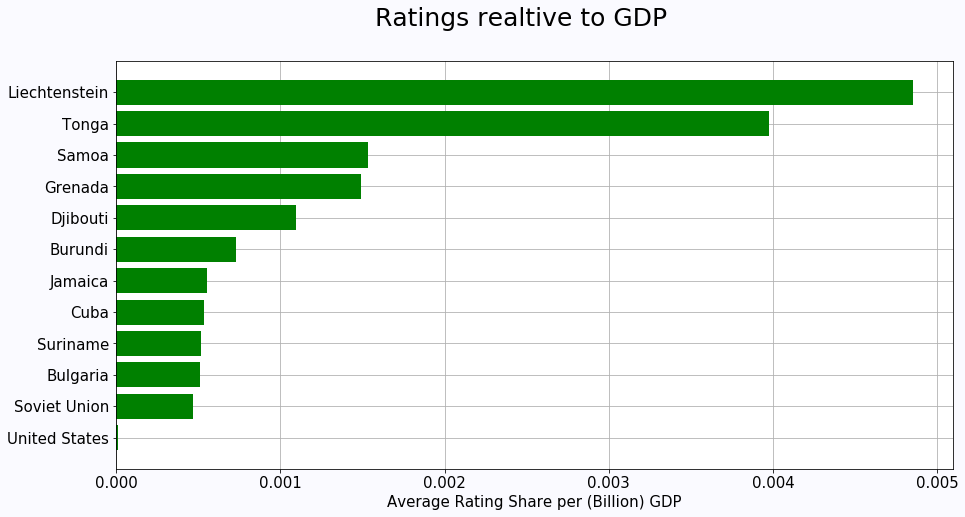

In [27]:
fig, ax = plt.subplots(facecolor='#fafaff')
ind = np.arange(12)

plt.legend()
plt.grid()
plt.xlabel('Average Rating Share per (Billion) GDP')
plt.ylabel('')
fig.suptitle('Ratings realtive to GDP', fontsize=25)
ax.set_axisbelow(True)

ax.barh(ind, temp.values.tolist() , color='Green')
ax.set_yticks(ind)
ax.set_yticklabels(temp.index.tolist())

plt.show()
fig.savefig('../../data/final/Graphs/GDPRelative.png')

# GDP Effect Overall
** With Outliers ** <br>
First we'll examine the effect with the outliers mentioned above the we'll look at GDPs effect without the outliers. 

** Line of Best Fit **

In [28]:
# Linear Regression 
x = df1.Norm_Rating_Share
y = df1.Norm_GDP
x_nparray = (x.values).reshape(len(x), 1)
y_nparray = (y.values).reshape(len(y), 1)
regr = LinearRegression()
regr.fit(x_nparray, y_nparray)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

** Correlation Between Rating Share and GDP **

In [29]:
# The correlation between GDP and Rating Share 
df1.Norm_Rating_Share.corr(df1.Norm_GDP)

0.3849116005833525

** Graphing GDPs effect on Rating Share ** 

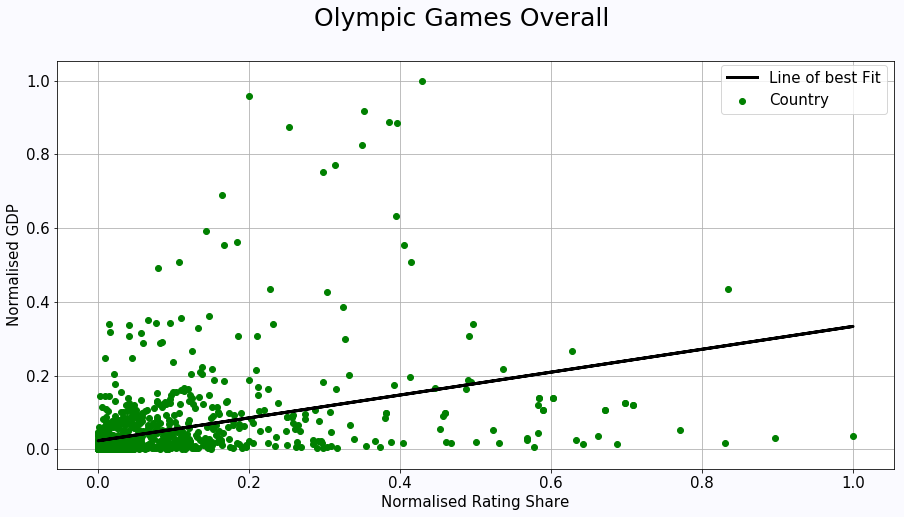

In [30]:
fig, ax = plt.subplots(facecolor='#fafaff')

ax.plot(x_nparray, regr.predict(x_nparray), color='black', linewidth=3)
ax.scatter(x, y, color='Green')
plt.legend()
plt.grid()
plt.xlabel('Normalised Rating Share')
plt.ylabel('Normalised GDP')
fig.suptitle('Olympic Games Overall', fontsize=25)
ax.set_axisbelow(True)
ax.legend(('Line of best Fit', 'Country'), bbox_to_anchor=(1, 1.01), loc=1)
plt.show()
fig.savefig('../../data/final/Graphs/GDP_Effect.png')

In [31]:
df1[df1['Norm_Rating_Share'] > 0.8]

,Year,Host_City,NOC,Host_Country,Summer,Winter,Total_Males,Total_Females,NOC_Males_Sent,NOC_Females_Sent,...,G_Total_Rating,Gold_Share,Medal_Share,Rating_Share,Norm_GDP,GDP_PerCapita,Norm_GDPPC,Norm_Gold_Share,Norm_Total_Medal_Share,Norm_Rating_Share
70,1964,Innsbruck,URS,AUS,False,True,892,199,53.0,16.0,...,205,0.382353,0.267327,0.292683,0.017013,1274.182443,0.009761,0.899654,0.848226,0.830076
250,1976,Innsbruck,URS,AUS,False,True,892,231,59.0,19.0,...,231,0.425000,0.289474,0.316017,0.030910,2054.037359,0.016610,1.000000,0.918757,0.896367
343,1980,Moscow,URS,RUS,True,False,4064,1115,340.0,150.0,...,1322,0.417391,0.314985,0.352496,0.036651,2350.126637,0.019210,0.982097,1.000000,1.000000
390,1984,Los Angeles,USA,USA,True,False,5263,1566,340.0,182.0,...,1445,0.390041,0.246238,0.294118,0.435798,31268.975645,0.273202,0.917745,0.781067,0.834152


# GDP effect over Individual Games
** Important **
We only discovered the affect that GDP has when we look at each games individually for summer and winter rather than overall. The difference is quite significant.  <br>
We first calculate the correlation between GDP and rating share for every olympics by themsevles. To do this we normailze the GDP values using Min-max nomralisation just for the GDP values of each given olympics seperately and we get the correlation of the nomralised GDP values and the nomralised rating share for each Olympics individually then we get an average correlation of all the individual correlations of each games.  


In [32]:
# Quickly getting all the names of the summer and winter olympics 
winter_list =[]
summer_list =[]

for x, row in df1.iterrows():
    
    city = df1['Host_City'].iloc[x]
    typeG = df1['Summer'].iloc[x]
    
    if(typeG == False):
        winter_list.append(city)
    else:
        summer_list.append(city)    

# getting only unique values for the games         
summer_list = list(set(summer_list))
winter_list = list(set(winter_list))

In [33]:
# creating two dictionaries to record the correlations 
WcorrGDPDict = {}
ScorrGDPDict = {}
OcorrGDPDict = {}
# We'll also create dfs each with there nomralised values 
sumdf = pd.DataFrame()
windf = pd.DataFrame()

In [34]:
# Getting the correlation between GDP and rating share for all the winter games 
warnings.filterwarnings('ignore')
for i in range(len(winter_list)):
    
    temp  = df1[df1['Host_City'] == winter_list[i]] 
    # min and max values 
    maxGDP = temp['GDP'].max()
    minGDP = temp['GDP'].min()
    temp['Norm_GDP'] = (temp['GDP'] - minGDP) / (maxGDP - minGDP) 
    # The correlation between GDP and Rating Share 
    corr  = temp.Norm_Rating_Share.corr(temp.Norm_GDP) 
    WcorrGDPDict.update({winter_list[i]: corr})
    
    # Creating the winter df
    
    windf = pd.concat([temp, windf])
    
wAvgCorr = np.mean(list(WcorrGDPDict.values()))

In [35]:
# Getting the correlation between GDP and rating share for all the summer games 
warnings.filterwarnings('ignore')
for i in range(len(summer_list)):
    
    temp  = df1[df1['Host_City'] == summer_list[i]] 
    # min and max values 
    maxGDP = temp['GDP'].max()
    minGDP = temp['GDP'].min()
    temp['Norm_GDP'] = (temp['GDP'] - minGDP) / (maxGDP - minGDP) 

    # The correlation between GDP and Rating Share 
    corr  = temp.Norm_Rating_Share.corr(temp.Norm_GDP) 
    ScorrGDPDict.update({summer_list[i]: corr})
    
        # Creating the winter df
    
    sumdf = pd.concat([temp, sumdf])
    
sAvgCorr = np.mean(list(ScorrGDPDict.values()))

In [36]:
# Getting the correlation between GDP and rating share for all the summer and winter games 
city_list = summer_list + winter_list
warnings.filterwarnings('ignore')
for i in range(len(city_list)):
    
    temp  = df1[df1['Host_City'] == city_list[i]] 
    # min and max values 
    maxGDP = temp['GDP'].max()
    minGDP = temp['GDP'].min()
    temp['Norm_GDP'] = (temp['GDP'] - minGDP) / (maxGDP - minGDP) 
    
    # The correlation between GDP and Rating Share 
    corr  = temp.Norm_Rating_Share.corr(temp.Norm_GDP) 
    OcorrGDPDict.update({city_list[i]: corr})
OAvgCorr = np.mean(list(OcorrGDPDict.values()))

In [37]:
# Summer and Winter Games average GDP and Rating share correlation 
OAvgCorr

0.4612643179485168

In [38]:
# Summer Games average GDP and Rating share correlation 
sAvgCorr

0.71462566072846379

In [39]:
# Summer Games average GDP and Rating share correlation 
wAvgCorr

0.18980573639857373

# Graphing the Results 

# Summer Games

In [40]:
# Linear Regression
# The calculation below give us the data needed to plot the line of best fit for the GDP rating analysis
x = sumdf.Norm_Rating_Share
y = sumdf.Norm_GDP
x_nparray = (x.values).reshape(len(x), 1)
y_nparray = (y.values).reshape(len(y), 1)
regr = LinearRegression()
regr.fit(x_nparray, y_nparray)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [41]:
# The correlation between GDP and Rating Share 
sumdf.Norm_Rating_Share.corr(sumdf.Norm_GDP)

0.66685441445282545

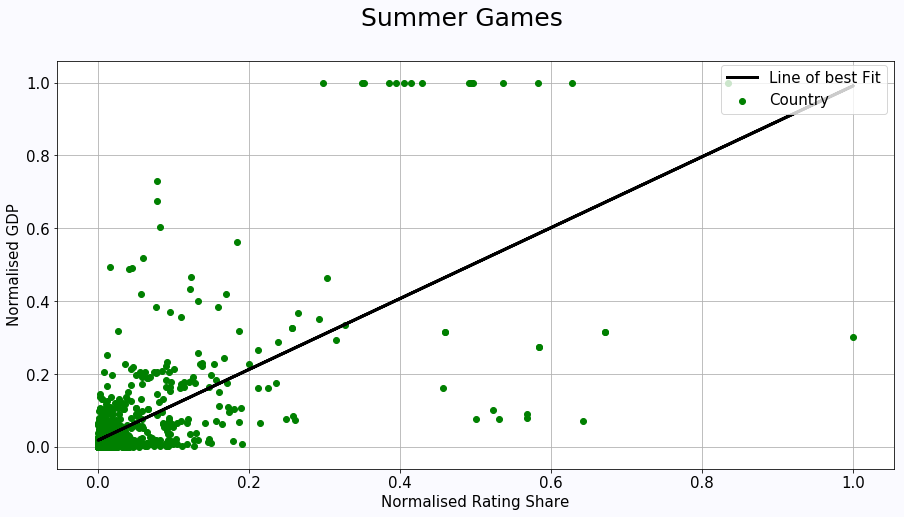

In [42]:
fig, ax = plt.subplots(facecolor='#fafaff')

ax.plot(x_nparray, regr.predict(x_nparray), color='black', linewidth=3)
ax.scatter(x, y, color='Green')
plt.legend()
plt.grid()
plt.xlabel('Normalised Rating Share')
plt.ylabel('Normalised GDP')
fig.suptitle('Summer Games', fontsize=25)
ax.set_axisbelow(True)
ax.legend(('Line of best Fit', 'Country'), bbox_to_anchor=(1, 1.01), loc=1)


plt.show()
fig.savefig('../../data/final/Graphs/GDP_SUMEffect.png')

In [43]:
ScorrGDPDict

{'Athens': 0.7849801788180587,
 'Atlanta': 0.76380637784932226,
 'Barcelone': 0.66780695367072029,
 'Beijing': 0.83725112677123303,
 'London': 0.84711518228148019,
 'Los Angeles': 0.90666575015070749,
 'Mexico': 0.78530193548542204,
 'Montréal': 0.60055280654133614,
 'Moscow': 0.40030532547499853,
 'Munich': 0.66693846758631126,
 'Rio': 0.88063311192764271,
 'Rome': 0.62329747889023912,
 'Seoul': 0.5505297569585782,
 'Sydney': 0.66935805094906131,
 'Tokyo': 0.73484240757184516}

In [44]:
# Creating a dictionary of all the games and there years
Dict = {}
df4 = df1.drop_duplicates(subset=['Host_City', 'Year']).reset_index()
for x, row in df4.iterrows():
    
    
    year = df4['Year'].iloc[x]
    host_city = df4['Host_City'].iloc[x]
    
    Dict.update({host_city: year})

In [45]:
# Creating tables of the correlations

sumCorrdf = pd.DataFrame(columns=['Host_City', 'Year', 'Correlation'])
winCorrdf = pd.DataFrame(columns=['Host_City', 'Year', 'Correlation'])

sumCorrdf['Host_City'] =  list(ScorrGDPDict.keys())
winCorrdf['Host_City'] =  list(WcorrGDPDict.keys())

for x, row in sumCorrdf.iterrows():
    
    host_city = sumCorrdf['Host_City'].iloc[x]
    
    sumCorrdf.loc[x, 'Year'] = Dict[host_city]
    sumCorrdf.loc[x, 'Correlation'] = ScorrGDPDict[host_city] 
    
    
for x, row in winCorrdf.iterrows():
    
    host_city = winCorrdf['Host_City'].iloc[x]
    
    winCorrdf.loc[x, 'Year'] = Dict[host_city]
    winCorrdf.loc[x, 'Correlation'] = WcorrGDPDict[host_city] 


sumCorrdf = sumCorrdf.sort_values(by=['Correlation'], ascending=False).reset_index()
# Dropping the old index 
sumCorrdf = sumCorrdf.drop(sumCorrdf.columns[[0]], axis=1)
winCorrdf = winCorrdf.sort_values(by=['Correlation'], ascending=False).reset_index()
# Dropping the old index 
winCorrdf = winCorrdf.drop(winCorrdf.columns[[0]], axis=1)

In [46]:
sumCorrdf.to_csv(r"..\..\data\final\summerCorrelationGDP.csv", index=False)
sumCorrdf

,Host_City,Year,Correlation
0,Los Angeles,1984,0.906666
1,Rio,2016,0.880633
2,London,2012,0.847115
3,Beijing,2008,0.837251
4,Mexico,1968,0.785302
5,Athens,2004,0.78498
6,Atlanta,1996,0.763806
7,Tokyo,1964,0.734842
8,Sydney,2000,0.669358
9,Barcelone,1992,0.667807


In [47]:
winCorrdf.to_csv(r"..\..\data\final\winterCorrelationGDP.csv", index=False)
winCorrdf

,Host_City,Year,Correlation
0,Vancouver,2010,0.569275
1,Salt Lake City,2002,0.400831
2,Turin,2006,0.327208
3,Lake Placid,1980,0.287731
4,Nagano,1998,0.224073
5,Sochi,2014,0.200844
6,Albertville,1992,0.177274
7,Squaw Valley,1960,0.162891
8,Sarajevo,1984,0.148772
9,Lillehammer,1994,0.104039


# Winter Games 

In [48]:
# Linear Regression
# The calculation below give us the data needed to plot the line of best fit for the GDP rating analysis
x = windf.Norm_Rating_Share
y = windf.Norm_GDP
x_nparray = (x.values).reshape(len(x), 1)
y_nparray = (y.values).reshape(len(y), 1)
regr = LinearRegression()
regr.fit(x_nparray, y_nparray)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [49]:
# The correlation between GDP and Rating Share 
windf.Norm_Rating_Share.corr(windf.Norm_GDP)

0.18364626845981735

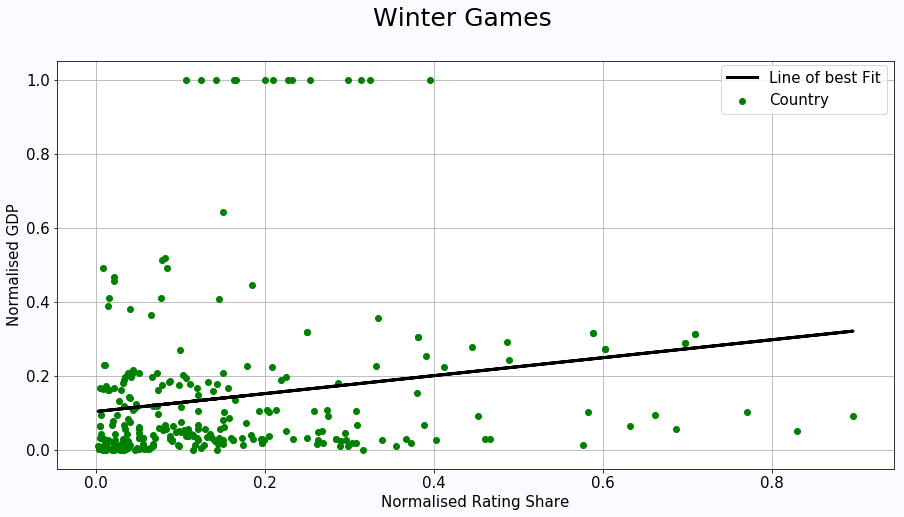

In [50]:
fig, ax = plt.subplots(facecolor='#fafaff')

ax.plot(x_nparray, regr.predict(x_nparray), color='black', linewidth=3)
ax.scatter(x, y, color='Green')
plt.legend()
plt.grid()
plt.xlabel('Normalised Rating Share')
plt.ylabel('Normalised GDP')
fig.suptitle('Winter Games', fontsize=25)
ax.set_axisbelow(True)
ax.legend(('Line of best Fit', 'Country'), bbox_to_anchor=(1, 1.01), loc=1)


plt.show()
fig.savefig('../../data/final/Graphs/GDP_WINEffect.png')

# Normalised GDP Effect Summary 
** Overall ** <br>
Now we have analysised GDP without the otuliers United States, Japan, China and Germany. What we found is that the correlation does not get any better. There is still a positive effect that GDP has on  rating share however the correlation drops to 0.34 so once again is not conclusive.
<br> 

# GDP Per Capita Analysis 
After looking at GDP with Rating shares the best next step would be to look at GDP per Capita as judging from the Ratings relative graphs from above should yield different results. 

** GDP Per Capitas effect on Ratings Share ** 

In [51]:
# Linear Regression 
x = df1.Norm_Rating_Share
y = df1.Norm_GDPPC
x_nparray = (x.values).reshape(len(x), 1)
y_nparray = (y.values).reshape(len(y), 1)
regr = LinearRegression()
regr.fit(x_nparray, y_nparray)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

** GDP Per Capitas Correlation with Rating Share ** 

In [52]:
# The correlation between GDP and Rating Share 
df1.Norm_Rating_Share.corr(df1.Norm_GDPPC)

0.16529593554666092

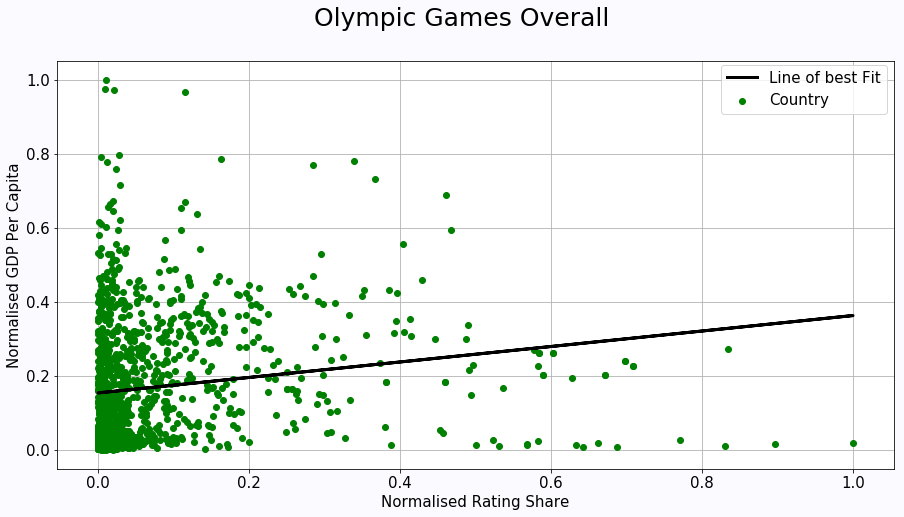

In [53]:
fig, ax = plt.subplots(facecolor='#fafaff')

ax.plot(x_nparray, regr.predict(x_nparray), color='black', linewidth=3)
ax.scatter(x, y, color='Green')
plt.legend()
plt.grid()
plt.xlabel('Normalised Rating Share')
plt.ylabel('Normalised GDP Per Capita')
fig.suptitle('Olympic Games Overall', fontsize=25)
ax.set_axisbelow(True)
ax.legend(('Line of best Fit', 'Country'), bbox_to_anchor=(1, 1.01), loc=1)


plt.show()
fig.savefig('../../data/final/Graphs/GDPPCEffect.png')

# Normalised GDP Per Capita Effect Summary 
** With Outliers ** <br>
After anaylising GDP Per Capita against rating share we can conclude that there is a small positive effect that GDP Per capita has on rating share however the effect not conclusive and has an extremely low correlation of only 0.9.

# GDP Per Capita effect over Individual Games

In [54]:
# creating two dictionaries to record the correlations 
WcorrGDPPCDict = {}
ScorrGDPPCDict = {}
OcorrGDPPCDict = {}
# We'll also create dfs each with there nomralised values 
sumdf = pd.DataFrame()
windf = pd.DataFrame()

In [55]:
# Getting the correlation between GDP per capita and rating share for all the winter games 
warnings.filterwarnings('ignore')
for i in range(len(winter_list)):
    
    temp  = df1[df1['Host_City'] == winter_list[i]] 
    # min and max values 
    maxGDP = temp['GDP_PerCapita'].max()
    minGDP = temp['GDP_PerCapita'].min()
    temp['Norm_GDPPC'] = (temp['GDP_PerCapita'] - minGDP) / (maxGDP - minGDP) 
    
    # The correlation between GDP and Rating Share 
    corr  = temp.Norm_Rating_Share.corr(temp.Norm_GDPPC) 
    WcorrGDPPCDict.update({winter_list[i]: corr})
    
    # Creating the winter df
    
    windf = pd.concat([temp, windf])
    
wAvgCorr = np.mean(list(WcorrGDPPCDict.values()))

In [56]:
# Getting the correlation between GDP per capita and rating share for all the summer games 
warnings.filterwarnings('ignore')
for i in range(len(summer_list)):
    
    temp  = df1[df1['Host_City'] == summer_list[i]] 
    # min and max values 
    maxGDP = temp['GDP_PerCapita'].max()
    minGDP = temp['GDP_PerCapita'].min()
    temp['Norm_GDPPC'] = (temp['GDP_PerCapita'] - minGDP) / (maxGDP - minGDP) 

    # The correlation between GDP and Rating Share 
    corr  = temp.Norm_Rating_Share.corr(temp.Norm_GDPPC) 
    ScorrGDPPCDict.update({summer_list[i]: corr})
    
        # Creating the winter df
    
    sumdf = pd.concat([temp, sumdf])
    
sAvgCorr = np.mean(list(ScorrGDPPCDict.values()))

In [57]:
# Getting the correlation between GDP Per capita and rating share for all the summer and winter games 
city_list = summer_list + winter_list
warnings.filterwarnings('ignore')
for i in range(len(city_list)):
    
    temp  = df1[df1['Host_City'] == city_list[i]] 
    # min and max values 
    maxGDP = temp['GDP_PerCapita'].max()
    minGDP = temp['GDP_PerCapita'].min()
    temp['Norm_GDPPC'] = (temp['GDP_PerCapita'] - minGDP) / (maxGDP - minGDP) 

    # The correlation between GDP and Rating Share 
    corr  = temp.Norm_Rating_Share.corr(temp.Norm_GDPPC) 
    OcorrGDPPCDict.update({city_list[i]: corr})
OAvgCorr = np.mean(list(OcorrGDPPCDict.values()))

In [58]:
# Summer and Winter Games average GDP Per capita and Rating share correlation 
OAvgCorr

0.13940931332121598

In [59]:
# Summer Games average GDP Per capita and Rating share correlation 
sAvgCorr

0.16353975334018347

In [60]:
# Summer Games average GDP Per capita  and Rating share correlation 
wAvgCorr

0.1135552704437507

# Graphing the Results 

# Summer Games 

In [61]:
# Linear Regression
# The calculation below give us the data needed to plot the line of best fit for the GDP rating analysis
x = sumdf.Norm_Rating_Share
y = sumdf.Norm_GDP
x_nparray = (x.values).reshape(len(x), 1)
y_nparray = (y.values).reshape(len(y), 1)
regr = LinearRegression()
regr.fit(x_nparray, y_nparray)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [62]:
# The correlation between GDP and Rating Share 
sumdf.Norm_Rating_Share.corr(sumdf.Norm_GDPPC)

0.15232115645852023

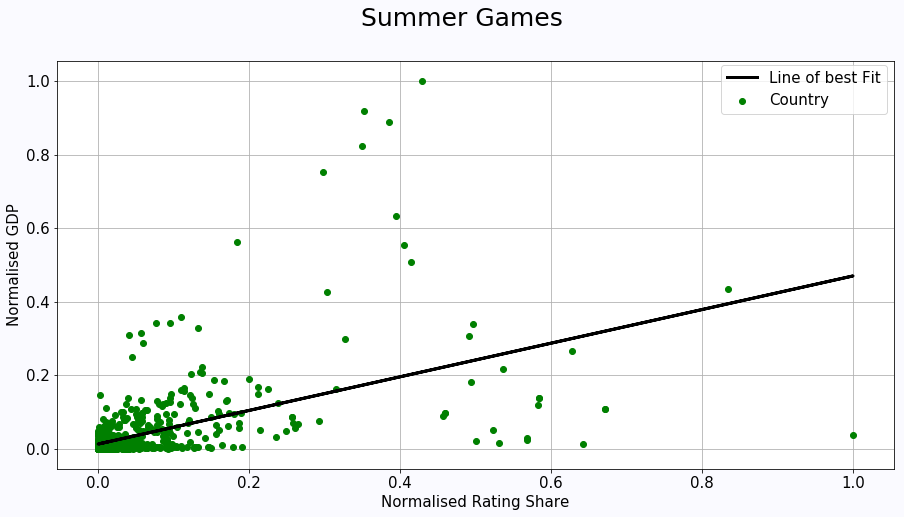

In [63]:
fig, ax = plt.subplots(facecolor='#fafaff')

ax.plot(x_nparray, regr.predict(x_nparray), color='black', linewidth=3)
ax.scatter(x, y, color='Green')
plt.legend()
plt.grid()
plt.xlabel('Normalised Rating Share')
plt.ylabel('Normalised GDP')
fig.suptitle('Summer Games', fontsize=25)
ax.set_axisbelow(True)
ax.legend(('Line of best Fit', 'Country'), bbox_to_anchor=(1, 1.01), loc=1)


plt.show()
fig.savefig('../../data/final/Graphs/GDPPC_SUMEffect.png')

# Creating the correlation Tables

In [64]:
# Creating tables of the correlations

sumCorrdf = pd.DataFrame(columns=['Host_City', 'Year', 'Correlation'])
winCorrdf = pd.DataFrame(columns=['Host_City', 'Year', 'Correlation'])

sumCorrdf['Host_City'] =  list(ScorrGDPPCDict.keys())
winCorrdf['Host_City'] =  list(WcorrGDPPCDict.keys())

for x, row in sumCorrdf.iterrows():
    
    host_city = sumCorrdf['Host_City'].iloc[x]
    
    sumCorrdf.loc[x, 'Year'] = Dict[host_city]
    sumCorrdf.loc[x, 'Correlation'] = ScorrGDPPCDict[host_city] 
    
    
for x, row in winCorrdf.iterrows():
    
    host_city = winCorrdf['Host_City'].iloc[x]
    
    winCorrdf.loc[x, 'Year'] = Dict[host_city]
    winCorrdf.loc[x, 'Correlation'] = WcorrGDPPCDict[host_city] 


sumCorrdf = sumCorrdf.sort_values(by=['Correlation'], ascending=False).reset_index()
# Dropping the old index 
sumCorrdf = sumCorrdf.drop(sumCorrdf.columns[[0]], axis=1)
winCorrdf = winCorrdf.sort_values(by=['Correlation'], ascending=False).reset_index()
# Dropping the old index 
winCorrdf = winCorrdf.drop(winCorrdf.columns[[0]], axis=1)

In [65]:
sumCorrdf.to_csv(r"..\..\data\final\summerCorrelationGDPPC.csv", index=False)
sumCorrdf

,Host_City,Year,Correlation
0,Atlanta,1996,0.275678
1,Los Angeles,1984,0.263959
2,Rio,2016,0.259968
3,Athens,2004,0.240925
4,Beijing,2008,0.240162
5,Sydney,2000,0.226433
6,London,2012,0.206407
7,Munich,1972,0.149523
8,Seoul,1988,0.142947
9,Mexico,1968,0.142384


In [66]:
winCorrdf.to_csv(r"..\..\data\final\winterCorrelationGDPPC.csv", index=False)
winCorrdf

,Host_City,Year,Correlation
0,Sochi,2014,0.518055
1,Salt Lake City,2002,0.498959
2,Vancouver,2010,0.449093
3,Nagano,1998,0.397684
4,Turin,2006,0.379841
5,Lillehammer,1994,0.3257
6,Grenoble,1968,0.118907
7,Albertville,1992,0.0981468
8,Sapporo,1972,-0.0715404
9,Lake Placid,1980,-0.107331


# Winter Games 

In [67]:
# Linear Regression
# The calculation below give us the data needed to plot the line of best fit for the GDP rating analysis
x = windf.Norm_Rating_Share
y = windf.Norm_GDP
x_nparray = (x.values).reshape(len(x), 1)
y_nparray = (y.values).reshape(len(y), 1)
regr = LinearRegression()
regr.fit(x_nparray, y_nparray)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [68]:
# The correlation between GDP and Rating Share 
windf.Norm_Rating_Share.corr(windf.Norm_GDPPC)

0.040342635149654561

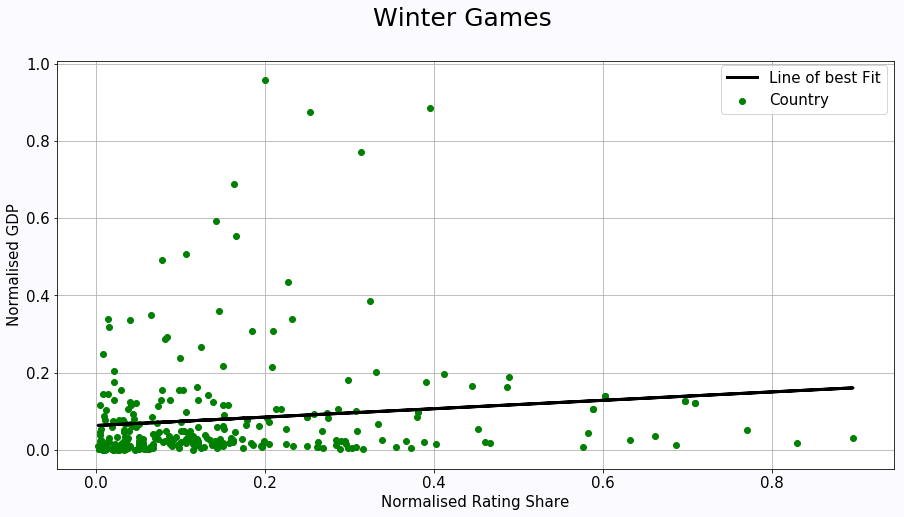

In [69]:
fig, ax = plt.subplots(facecolor='#fafaff')

ax.plot(x_nparray, regr.predict(x_nparray), color='black', linewidth=3)
ax.scatter(x, y, color='Green')
plt.legend()
plt.grid()
plt.xlabel('Normalised Rating Share')
plt.ylabel('Normalised GDP')
fig.suptitle('Winter Games', fontsize=25)
ax.set_axisbelow(True)
ax.legend(('Line of best Fit', 'Country'), bbox_to_anchor=(1, 1.01), loc=1)


plt.show()
fig.savefig('../../data/final/Graphs/GDPPC_WINEffect.png')